In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
factor=(1+np.sqrt(5))/2

In [3]:
cols=["Year","Month","Day","Date in fraction of year","Daily total SSN","Daily std","Number of observations","Definitive/provisional"]
silso=pd.read_csv("SN_d_tot_V2.0-2.csv",delimiter=";",names=cols)

In [4]:
silso=silso[silso["Year"]>=2011][["Year","Month","Day","Daily total SSN","Daily std"]]
silso.head()

,Year,Month,Day,Daily total SSN,Daily std
70492,2011,1,1,48,3.6
70493,2011,1,2,48,3.4
70494,2011,1,3,47,2.1
70495,2011,1,4,48,4.1
70496,2011,1,5,36,4.0


In [5]:
datas=[]
for i in glob.glob("ivg*.csv"):
    dat=pd.read_csv(i)
    datas.append(dat)
datas_all=pd.concat(datas,axis=0).sort_values(by="datetime")

In [6]:
datas_all.head()

,datetime,k3_b001,k3_b002,k3_b003,k3_b004,k3_b005,k3_b006,k3_b007,k3_b008,k3_b009,...,k4_b1015,k4_b1016,k4_b1017,k4_b1018,k4_b1019,k4_b1020,k4_b1021,k4_b1022,k4_b1023,k4_b1024
0,2011-01-01 12:00:00,0.398119,0.091720,0.092732,0.0,0.214949,0.063042,0.062920,0.0,0.138648,...,0.000000,0.000000,0.0,0.0,0.002047,0.001182,0.0,0.0,0.001672,0.000000
1,2011-01-02 12:00:00,0.398391,0.091551,0.092813,0.0,0.215511,0.063624,0.063360,0.0,0.139687,...,0.000000,0.001182,0.0,0.0,0.001672,0.001182,0.0,0.0,0.001672,0.000000
2,2011-01-03 12:00:00,0.398282,0.091718,0.092105,0.0,0.214679,0.063886,0.064709,0.0,0.138997,...,0.002047,0.000000,0.0,0.0,0.000000,0.001672,0.0,0.0,0.001182,0.001182
3,2011-01-04 12:00:00,0.397951,0.091901,0.094496,0.0,0.215326,0.063152,0.064311,0.0,0.138647,...,0.001182,0.000000,0.0,0.0,0.002364,0.000000,0.0,0.0,0.000000,0.001182
4,2011-01-05 12:00:00,0.398417,0.092141,0.092819,0.0,0.215032,0.063040,0.064773,0.0,0.139140,...,0.000000,0.000000,0.0,0.0,0.002047,0.000000,0.0,0.0,0.000000,0.001672


In [7]:
datas_all["Year"]=pd.to_datetime(datas_all["datetime"]).dt.year
datas_all["Month"]=pd.to_datetime(datas_all["datetime"]).dt.month
datas_all["Day"]=pd.to_datetime(datas_all["datetime"]).dt.day
datas_all=datas_all.drop(columns=["datetime"])

In [8]:
data_final=pd.merge(silso,datas_all,on=["Year","Month","Day"])

In [9]:
data_final.index=pd.to_datetime(dict(year=data_final.Year, month=data_final.Month, day=data_final.Day))
data_final.head()

,Year,Month,Day,Daily total SSN,Daily std,k3_b001,k3_b002,k3_b003,k3_b004,k3_b005,...,k4_b1015,k4_b1016,k4_b1017,k4_b1018,k4_b1019,k4_b1020,k4_b1021,k4_b1022,k4_b1023,k4_b1024
2011-01-01,2011,1,1,48,3.6,0.398119,0.091720,0.092732,0.0,0.214949,...,0.000000,0.000000,0.0,0.0,0.002047,0.001182,0.0,0.0,0.001672,0.000000
2011-01-02,2011,1,2,48,3.4,0.398391,0.091551,0.092813,0.0,0.215511,...,0.000000,0.001182,0.0,0.0,0.001672,0.001182,0.0,0.0,0.001672,0.000000
2011-01-03,2011,1,3,47,2.1,0.398282,0.091718,0.092105,0.0,0.214679,...,0.002047,0.000000,0.0,0.0,0.000000,0.001672,0.0,0.0,0.001182,0.001182
2011-01-04,2011,1,4,48,4.1,0.397951,0.091901,0.094496,0.0,0.215326,...,0.001182,0.000000,0.0,0.0,0.002364,0.000000,0.0,0.0,0.000000,0.001182
2011-01-05,2011,1,5,36,4.0,0.398417,0.092141,0.092819,0.0,0.215032,...,0.000000,0.000000,0.0,0.0,0.002047,0.000000,0.0,0.0,0.000000,0.001672


In [10]:
data_final.to_csv("k34_allyears.csv", index=True)

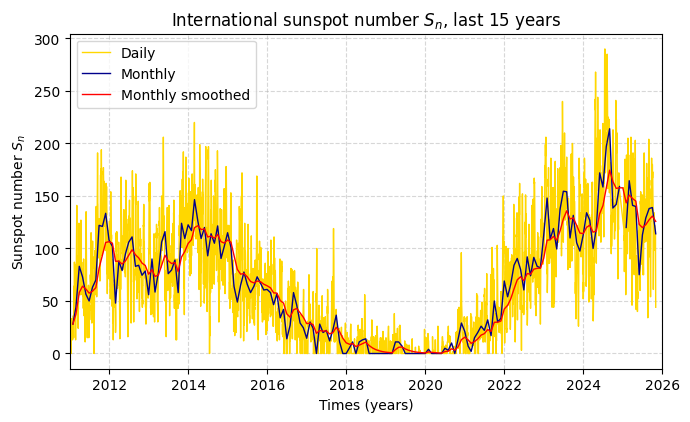

In [11]:
data_final["Daily total SSN"].plot(figsize=(7,7/factor),alpha=1,c="gold",lw=1,label="Daily")
data_final["Daily total SSN"].resample("ME").median().plot(figsize=(7,7/factor),alpha=1,c="darkblue",lw=1,label="Monthly")
(data_final["Daily total SSN"].resample("ME").median()).ewm(alpha=0.3).mean().plot(figsize=(7,7/factor),c="r",lw=1,label="Monthly smoothed")
plt.legend(),plt.grid(alpha=0.5,linestyle="--")
plt.ylabel(r"Sunspot number $S_n$"); plt.xlabel("Times (years)");plt.xticks(rotation=0,ha="center");plt.xlim("2011","2026")
plt.title(r"International sunspot number $S_n$, last 15 years")
plt.tight_layout()
plt.savefig("Sunspot_2011_2025.png", dpi=300, bbox_inches="tight")
plt.show()

# Ridge/Hubert, modelos lineales, pero....

Un split aleatorio (en vez de temporal), te dejo un bloque reutilizable que: 
- arma train/val/test con train_test_split (una o dos pasadas), permite estratificar para que la distribución de y (o de “fase”) quede parecida en cada parte,
- corre Ridge y Huber con o sin PCA,
- devuelve una tabla con métricas en TRAIN/VAL/TEST.

In [12]:
# =====================================================================
# RANDOM SUITE (Ridge & Huber) — con/ sin PCA, con/ sin ablación
# - Selecciona hiperparámetros por RMSE en validación
# - Opcional: keep_all=True para registrar TODAS las combinaciones
# - Devuelve: (DataFrame ordenado por VA_RMSE, dict de mejores pipelines)
# =====================================================================
import numpy as np
import pandas as pd
from typing import Tuple, Dict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr

def make_feature_matrix(df, prefixes=("k3_","k4_")):
    cols = [c for c in df.columns if c.startswith(prefixes)]
    return df[cols].to_numpy(dtype=float), cols

def stratify_labels(df: pd.DataFrame, y: np.ndarray, mode="y_quantiles", n_bins=10):
    if mode is None:
        return None
    if mode == "y_quantiles":
        ranks = pd.Series(y).rank(method="average", pct=True).to_numpy()
        return pd.qcut(ranks, q=n_bins, labels=False, duplicates="drop")
    if mode == "month":
        return df.index.month.to_numpy()
    if mode == "phase27":
        s27 = pd.Series(y, index=df.index).rolling(27, min_periods=10).mean()
        der = s27.diff().fillna(0.0)
        return np.where(der > 0, 2, np.where(der < 0, 0, 1))  # 0 falling, 1 flat, 2 rising
    return None

def metrics_all(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "Spearman": spearmanr(y_true, y_pred).statistic
    }

def build_pipeline(model_name: str,
                   alpha: float = 1.0,
                   epsilon: float = 1.35,
                   use_pca: bool = False,
                   n_components: int = None) -> Pipeline:
    steps = [("sc", StandardScaler(with_mean=False))]
    if use_pca and n_components:
        steps.append(("pca", PCA(n_components=n_components, whiten=True, random_state=0)))
    if model_name == "ridge":
        steps.append(("model", Ridge(alpha=alpha, random_state=0)))
    elif model_name == "huber":
        steps.append(("model", HuberRegressor(alpha=alpha, epsilon=epsilon, max_iter=500)))
    else:
        raise ValueError("model_name debe ser 'ridge' o 'huber'.")
    return Pipeline(steps)

def run_random_suite(df: pd.DataFrame,
                     target_col: str = "Daily total SSN",
                     test_size: float = 0.2,
                     val_size: float = 0.2,
                     stratify_mode: str = "y_quantiles",   # None | "y_quantiles" | "month" | "phase27"
                     models: Tuple[str, ...] = ("ridge","huber"),
                     ridge_alphas: Tuple[float, ...] = (0.3, 1.0, 3.0, 10.0, 30.0),
                     huber_grid: Tuple[Tuple[float, float], ...] = ((1e-4,1.35),(1e-3,1.35),(1e-3,1.8),(1e-2,1.35)),
                     use_pca: bool = False,
                     n_components: int = None,
                     prefixes_sets: Tuple[Tuple[str, ...], ...] = (("k3_",), ("k3_","k4_")),
                     keep_all: bool = False,               # <- NUEVO: guarda todas las combinaciones del grid
                     random_state: int = 42
                    ) -> Tuple[pd.DataFrame, Dict[str, Pipeline]]:
    """
    Ejecuta entrenamientos con split aleatorio (train/val/test) y devuelve:
      - DataFrame con métricas TR/VA/TE por configuración.
      - Diccionario de mejores pipelines por {modelo×features×PCA}.

    Si keep_all=True, se registran todas las combinaciones del grid y se marca la mejor con Best=True.
    """
    # ---- preparación y splits ----
    df = df.sort_index().copy()
    y = df[target_col].to_numpy(dtype=float)

    # columnas por set de prefijos (ablación)
    if not prefixes_sets:
        prefixes_sets = (("k3_","k4_"),)

    # estratificación (opcional)
    strat = stratify_labels(df, y, mode=stratify_mode) if stratify_mode else None

    idx_all = np.arange(len(df))
    idx_trv, idx_te = train_test_split(idx_all, test_size=test_size, random_state=random_state,
                                       shuffle=True, stratify=strat)
    strat_trv = strat[idx_trv] if strat is not None else None
    val_rel = val_size / (1.0 - test_size)
    idx_tr, idx_va = train_test_split(idx_trv, test_size=val_rel, random_state=random_state+1,
                                      shuffle=True, stratify=strat_trv)

    results = []
    best_pipes: Dict[str, Pipeline] = {}

    for pref_set in prefixes_sets:
        cols = [c for c in df.columns if any(c.startswith(p) for p in pref_set)]
        X = df[cols].to_numpy(dtype=float)
        Xtr, Xva, Xte = X[idx_tr], X[idx_va], X[idx_te]
        ytr, yva, yte = y[idx_tr], y[idx_va], y[idx_te]

        for m in models:
            # grid de hiperparámetros
            if m == "ridge":
                grid = [{"alpha": a} for a in ridge_alphas]
            elif m == "huber":
                grid = [{"alpha": a, "epsilon": e} for (a, e) in huber_grid]
            else:
                raise ValueError("models solo admite 'ridge' y/o 'huber'.")

            best_rmse, best_hp, best_pipe, best_row = None, None, None, None
            group_rows = []  # para keep_all

            for hp in grid:
                pipe = build_pipeline(
                    model_name=m,
                    alpha=hp["alpha"],
                    epsilon=hp.get("epsilon", 1.35),
                    use_pca=use_pca,
                    n_components=n_components
                )
                pipe.fit(Xtr, ytr)
                y_tr_hat = pipe.predict(Xtr)
                y_va_hat = pipe.predict(Xva)
                y_te_hat = pipe.predict(Xte)

                metr_tr = metrics_all(ytr, y_tr_hat)
                metr_va = metrics_all(yva, y_va_hat)
                metr_te = metrics_all(yte, y_te_hat)

                row = {
                    "Model": m.upper(),
                    "Features": "+".join(pref_set),
                    "PCA": use_pca,
                    "PCs": n_components if (use_pca and n_components) else 0,
                    "HP": hp,
                    **{f"TR_{k}": v for k, v in metr_tr.items()},
                    **{f"VA_{k}": v for k, v in metr_va.items()},
                    **{f"TE_{k}": v for k, v in metr_te.items()},
                    "n_train": len(idx_tr), "n_val": len(idx_va), "n_test": len(idx_te),
                    "split": f"random strat={stratify_mode}"
                }

                if keep_all:
                    row["Best"] = False
                    group_rows.append(row)

                if (best_rmse is None) or (metr_va["RMSE"] < best_rmse):
                    best_rmse, best_hp, best_pipe, best_row = metr_va["RMSE"], hp, pipe, row

            # guardar mejor por grupo
            tag = f"{m.upper()}|{'+'.join(pref_set)}|PCA={use_pca}|PCs={best_row['PCs']}"
            best_pipes[tag] = best_pipe

            if keep_all:
                # marca el ganador
                for r in group_rows:
                    if r["HP"] == best_hp:
                        r["Best"] = True
                        break
                results.extend(group_rows)
            else:
                results.append(best_row)

    df_res = pd.DataFrame(results).sort_values(["Model","Features","PCA","VA_RMSE"])
    return df_res, best_pipes
    
    # ====================================================================

# EJEMPLOS RÁPIDOS
# 1) Random simple, sin PCA, ablación k3 vs k3+k4
# res, pipes = run_random_suite(data_final, stratify_mode=None, use_pca=False)

# 2) Random estratificado por quantiles de y (recomendado para mantener distribución)
# res_q, pipes_q = run_random_suite(data_final, stratify_mode="y_quantiles", use_pca=False)

# 3) Con PCA=128 y estratificado por “fase” (derivada 27d)
# res_pca, pipes_pca = run_random_suite(data_final, stratify_mode="phase27",
#                                       use_pca=True, n_components=128)


In [13]:
# 1) Random simple: None | "y_quantiles" | "month" | "phase27", sin PCA y con PCA, ablación k3 vs k3+k4
res10_1, pipes10_1 = run_random_suite(data_final, stratify_mode=None, use_pca=False, keep_all=True)
res11_1, pipes11_1 = run_random_suite(data_final, stratify_mode=None, use_pca=True, n_components=64, keep_all=True)
res12_1, pipes12_1 = run_random_suite(data_final, stratify_mode=None, use_pca=True, n_components=128, keep_all=True)
res13_1, pipes13_1 = run_random_suite(data_final, stratify_mode=None, use_pca=True, n_components=256, keep_all=True)

res20_1, pipes20_1 = run_random_suite(data_final, stratify_mode="y_quantiles", use_pca=False, keep_all=True)
res21_1, pipes21_1 = run_random_suite(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=64, keep_all=True)
res22_1, pipes22_1 = run_random_suite(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=128, keep_all=True)
res23_1, pipes23_1 = run_random_suite(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=256, keep_all=True)

res30_1, pipes30_1 = run_random_suite(data_final, stratify_mode="month", use_pca=False, keep_all=True)
res31_1, pipes31_1 = run_random_suite(data_final, stratify_mode="month", use_pca=True, n_components=64, keep_all=True)
res32_1, pipes32_1 = run_random_suite(data_final, stratify_mode="month", use_pca=True, n_components=128, keep_all=True)
res33_1, pipes33_1 = run_random_suite(data_final, stratify_mode="month", use_pca=True, n_components=256, keep_all=True)

res40_1, pipes40_1 = run_random_suite(data_final, stratify_mode="phase27", use_pca=False, keep_all=True)
res41_1, pipes41_1 = run_random_suite(data_final, stratify_mode="phase27", use_pca=True, n_components=64, keep_all=True)
res42_1, pipes42_1 = run_random_suite(data_final, stratify_mode="phase27", use_pca=True, n_components=128, keep_all=True)
res43_1, pipes43_1 = run_random_suite(data_final, stratify_mode="phase27", use_pca=True, n_components=256, keep_all=True)

In [14]:
res1=pd.concat([res10_1,res11_1,res12_1,res13_1,res20_1,res21_1,res22_1,res23_1,res30_1,res31_1,res32_1,res33_1,res40_1,res41_1,res42_1,res43_1],axis=0)

In [15]:
res1.to_csv("Results_Linear.csv",index=False)

# RANDOM SUITE (no lineales): MLP • Gradient Boosting • Random Forest
- Mismo método que antes: split aleatorio (con/ sin estratificación), ablación de features (k3 vs k3+k4), opcional PCA, métricas TR/VA/TE
- Devuelve: DataFrame ordenado por VA_RMSE y dict de mejores pipelines

In [16]:
# =====================================================================
# RANDOM SUITE (no lineales): MLP • Gradient Boosting • Random Forest
# - Split aleatorio con/ sin estratificación
# - Ablación de features (k3 vs k3+k4)
# - Opcional PCA antes del modelo
# - Selección por RMSE en VALIDATION
# - keep_all=True para registrar TODO el grid y marcar el mejor (Best=True)
# - Devuelve: (DataFrame ordenado, dict de mejores pipelines por grupo)
# =====================================================================
import numpy as np
import pandas as pd
from typing import Tuple, Dict, Iterable, Optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr

# --- helpers compartidos (mismo contrato que tu suite lineal) ---
def stratify_labels(df: pd.DataFrame, y: np.ndarray, mode="y_quantiles", n_bins=10):
    if mode is None:
        return None
    if mode == "y_quantiles":
        ranks = pd.Series(y).rank(method="average", pct=True).to_numpy()
        return pd.qcut(ranks, q=n_bins, labels=False, duplicates="drop")
    if mode == "month":
        return df.index.month.to_numpy()
    if mode == "phase27":
        s27 = pd.Series(y, index=df.index).rolling(27, min_periods=10).mean()
        der = s27.diff().fillna(0.0)
        return np.where(der>0, 2, np.where(der<0, 0, 1))  # 0 falling, 1 flat, 2 rising
    return None

def metrics_all(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "Spearman": spearmanr(y_true, y_pred).statistic
    }

def make_feature_matrix(df: pd.DataFrame, prefixes: Iterable[str]):
    cols = [c for c in df.columns if any(c.startswith(p) for p in prefixes)]
    return df[cols].to_numpy(dtype=float), cols

def build_pipeline_nonlin(model_name: str,
                          hp: dict,
                          use_pca: bool = False,
                          n_components: Optional[int] = None,
                          random_state: int = 0) -> Pipeline:
    steps = []
    if model_name == "mlp":
        steps.append(("sc", StandardScaler(with_mean=True)))
        if use_pca and n_components:
            steps.append(("pca", PCA(n_components=n_components, whiten=True, random_state=random_state)))
        steps.append(("model", MLPRegressor(random_state=random_state, **hp)))
    elif model_name == "gbr":
        if use_pca and n_components:
            steps.append(("pca", PCA(n_components=n_components, whiten=True, random_state=random_state)))
        steps.append(("model", GradientBoostingRegressor(random_state=random_state, **hp)))
    elif model_name == "rf":
        if use_pca and n_components:
            steps.append(("pca", PCA(n_components=n_components, whiten=True, random_state=random_state)))
        steps.append(("model", RandomForestRegressor(random_state=random_state, n_jobs=-1, **hp)))
    else:
        raise ValueError("model_name debe ser 'mlp', 'gbr' o 'rf'.")
    return Pipeline(steps)

def run_random_suite_nonlinear(df: pd.DataFrame,
                               target_col: str = "Daily total SSN",
                               test_size: float = 0.2,
                               val_size: float = 0.2,
                               stratify_mode: Optional[str] = "y_quantiles",   # None | "y_quantiles" | "month" | "phase27"
                               prefixes_sets: Tuple[Tuple[str, ...], ...] = (("k3_",), ("k3_","k4_")),  # ablación
                               use_pca: bool = False,
                               n_components: Optional[int] = None,
                               # grids compactos por defecto (ajustables por llamada)
                               grid_mlp: Optional[list] = None,
                               grid_gbr: Optional[list] = None,
                               grid_rf: Optional[list]  = None,
                               keep_all: bool = False,   # << NUEVO: registra todo el grid
                               random_state: int = 42
                               ) -> Tuple[pd.DataFrame, Dict[str, Pipeline]]:

    df = df.sort_index().copy()
    y = df[target_col].to_numpy(dtype=float)

    # Estratificación
    strat = stratify_labels(df, y, mode=stratify_mode) if stratify_mode else None

    # Split aleatorio: TEST primero, luego VAL dentro de TRAINVAL
    idx_all = np.arange(len(df))
    idx_trv, idx_te = train_test_split(idx_all, test_size=test_size, random_state=random_state,
                                       shuffle=True, stratify=strat)
    strat_trv = strat[idx_trv] if strat is not None else None
    val_rel = val_size / (1.0 - test_size)
    idx_tr, idx_va = train_test_split(idx_trv, test_size=val_rel, random_state=random_state+1,
                                      shuffle=True, stratify=strat_trv)

    # Grids por defecto (si no pasas los tuyos)
    if grid_mlp is None:
        grid_mlp = [
            {"hidden_layer_sizes": (64,),    "alpha": 1e-4, "learning_rate_init": 1e-3,
             "max_iter": 400, "early_stopping": True, "n_iter_no_change": 20, "batch_size": 128},
            {"hidden_layer_sizes": (128,),   "alpha": 1e-4, "learning_rate_init": 1e-3,
             "max_iter": 500, "early_stopping": True, "n_iter_no_change": 20, "batch_size": 128},
            {"hidden_layer_sizes": (128,64), "alpha": 1e-3, "learning_rate_init": 1e-3,
             "max_iter": 500, "early_stopping": True, "n_iter_no_change": 20, "batch_size": 128},
        ]
    if grid_gbr is None:
        grid_gbr = [
            {"n_estimators": 600, "learning_rate": 0.05, "max_depth": 3, "loss": "huber", "alpha": 0.9},
            {"n_estimators": 800, "learning_rate": 0.05, "max_depth": 3, "loss": "huber", "alpha": 0.9},
            {"n_estimators": 600, "learning_rate": 0.10, "max_depth": 2, "loss": "huber", "alpha": 0.9},
        ]
    if grid_rf is None:
        grid_rf = [
            {"n_estimators": 400, "max_depth": None, "min_samples_leaf": 1},
            {"n_estimators": 600, "max_depth": 20,   "min_samples_leaf": 1},
            {"n_estimators": 600, "max_depth": 12,   "min_samples_leaf": 3},
        ]

    results = []
    best_pipes: Dict[str, Pipeline] = {}

    for pref_set in prefixes_sets:
        X, _ = make_feature_matrix(df, prefixes=pref_set)
        Xtr, Xva, Xte = X[idx_tr], X[idx_va], X[idx_te]
        ytr, yva, yte = y[idx_tr], y[idx_va], y[idx_te]

        grids = {"mlp": grid_mlp, "gbr": grid_gbr, "rf": grid_rf}

        for mname in ("mlp", "gbr", "rf"):
            group_rows = []
            best_rmse, best_hp, best_pipe, best_row = None, None, None, None

            for hp in grids[mname]:
                pipe = build_pipeline_nonlin(mname, hp, use_pca=use_pca, n_components=n_components, random_state=0)
                pipe.fit(Xtr, ytr)
                y_tr_hat = pipe.predict(Xtr)
                y_va_hat = pipe.predict(Xva)
                y_te_hat = pipe.predict(Xte)

                metr_tr = metrics_all(ytr, y_tr_hat)
                metr_va = metrics_all(yva, y_va_hat)
                metr_te = metrics_all(yte, y_te_hat)   # ← ¡ojo! y_true primero

                row = {
                    "Model": mname.upper(),
                    "Features": "+".join(pref_set),
                    "PCA": use_pca,
                    "PCs": n_components if (use_pca and n_components) else 0,
                    "HP": hp,
                    **{f"TR_{k}": v for k,v in metr_tr.items()},
                    **{f"VA_{k}": v for k,v in metr_va.items()},
                    **{f"TE_{k}": v for k,v in metr_te.items()},
                    "n_train": len(idx_tr), "n_val": len(idx_va), "n_test": len(idx_te),
                    "split": f"random strat={stratify_mode}"
                }

                if keep_all:
                    row["Best"] = False
                    group_rows.append(row)

                if (best_rmse is None) or (metr_va["RMSE"] < best_rmse):
                    best_rmse, best_hp, best_pipe, best_row = metr_va["RMSE"], hp, pipe, row

            tag = f"{mname.upper()}|{'+'.join(pref_set)}|PCA={use_pca}|PCs={best_row['PCs']}"
            best_pipes[tag] = best_pipe

            if keep_all:
                # marca el ganador
                for r in group_rows[::-1]:
                    if r["HP"] == best_hp:
                        r["Best"] = True
                        break
                results.extend(group_rows)
            else:
                results.append(best_row)

    df_res = pd.DataFrame(results).sort_values(["Model", "Features", "PCA", "VA_RMSE"])
    return df_res, best_pipes

In [17]:
# 2) Random simple: None | "y_quantiles" | "month" | "phase27", sin PCA y con PCA, ablación k3 vs k3+k4
res10_2, pipes10_2 = run_random_suite_nonlinear(data_final, stratify_mode=None, use_pca=False, keep_all=True)
res11_2, pipes11_2 = run_random_suite_nonlinear(data_final, stratify_mode=None, use_pca=True, n_components=64, keep_all=True)
res12_2, pipes12_2 = run_random_suite_nonlinear(data_final, stratify_mode=None, use_pca=True, n_components=128, keep_all=True)
res13_2, pipes13_2 = run_random_suite_nonlinear(data_final, stratify_mode=None, use_pca=True, n_components=256, keep_all=True)

res20_2, pipes20_2 = run_random_suite_nonlinear(data_final, stratify_mode="y_quantiles", use_pca=False, keep_all=True)
res21_2, pipes21_2 = run_random_suite_nonlinear(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=64, keep_all=True)
res22_2, pipes22_2 = run_random_suite_nonlinear(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=128, keep_all=True)
res23_2, pipes23_2 = run_random_suite_nonlinear(data_final, stratify_mode="y_quantiles", use_pca=True, n_components=256, keep_all=True)

res30_2, pipes30_2 = run_random_suite_nonlinear(data_final, stratify_mode="month", use_pca=False, keep_all=True)
res31_2, pipes31_2 = run_random_suite_nonlinear(data_final, stratify_mode="month", use_pca=True, n_components=64, keep_all=True)
res32_2, pipes32_2 = run_random_suite_nonlinear(data_final, stratify_mode="month", use_pca=True, n_components=128, keep_all=True)
res33_2, pipes33_2 = run_random_suite_nonlinear(data_final, stratify_mode="month", use_pca=True, n_components=256, keep_all=True)

res40_2, pipes40_2 = run_random_suite_nonlinear(data_final, stratify_mode="phase27", use_pca=False, keep_all=True)
res41_2, pipes41_2 = run_random_suite_nonlinear(data_final, stratify_mode="phase27", use_pca=True, n_components=64, keep_all=True)
res42_2, pipes42_2 = run_random_suite_nonlinear(data_final, stratify_mode="phase27", use_pca=True, n_components=128, keep_all=True)
res43_2, pipes43_2 = run_random_suite_nonlinear(data_final, stratify_mode="phase27", use_pca=True, n_components=256, keep_all=True)

In [18]:
res2=pd.concat([res10_2,res11_2,res12_2,res13_2,res20_2,res21_2,res22_2,res23_2,res30_2,res31_2,res32_2,res33_2,res40_2,res41_2,res42_2,res43_2],axis=0)

In [19]:
res2.to_csv("Results_Non_Linear.csv",index=False)